In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")
import gran

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker

In [5]:
ng_path = gran.get_cache_path('lang_model', 'ngram_db.sqlite3')

In [6]:
engine = create_engine('sqlite:///' + str(ng_path))
Session = sessionmaker(bind=engine)

In [7]:
sess = Session()

In [8]:
sess.query(gran.NGram).filter(gran.NGram.ncharac==2).filter(gran.NGram.ngram == "我們").all()

[<NGram: 我們, 146354760>, <NGram: 我們, 9082804>]

In [20]:
ncharac_counts = sess.query(gran.NGram.ncharac, func.count(gran.NGram.ncharac)).group_by(gran.NGram.ncharac).all()

<BarContainer object of 16 artists>

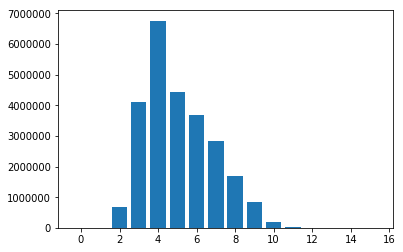

In [27]:
plt.bar([x[0] for x in ncharac_counts], [x[1] for x in ncharac_counts])

In [35]:
sess.query(gran.NGram).filter(gran.NGram.ncharac==13).order_by(gran.NGram.freq.desc()).limit(10).all()

[<NGram: 人民共和國奧林匹克委員會的, 2565>,
 <NGram: 阿爾巴尼亞人民在阿爾巴尼亞, 1840>,
 <NGram: 共產黨中央委員會中央委員會, 1479>,
 <NGram: 全心全意爲人民服務全心全意, 1440>,
 <NGram: 阿爾巴尼亞人民和阿爾巴尼亞, 1369>,
 <NGram: 轟轟烈烈的太平天國革命運動, 1360>,
 <NGram: 人民共和國政務院總理周恩來, 1198>,
 <NGram: 人民共和國和保加利亞共和國, 1058>,
 <NGram: 南斯拉夫首都貝爾格萊德舉行, 1013>,
 <NGram: 人民共和國駐印度尼西亞大使, 1011>]